# Exploratory Data Analysis
### Information : Dataset of weather and ozone concentration measurements during the summer of 2001 in Rennes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tools import *
from math import ceil

In [2]:
import importlib
import tools
importlib.reload(tools)

<module 'tools' from 'c:\\Users\\alexi\\OneDrive - ISEP\\Bureau\\Data science\\github\\Data Exploration Notebooks\\tools.py'>

Setting up

In [3]:
data = pd.read_csv("DataSet1.csv", sep=",", index_col='obs')

In [4]:
data.T12.describe()

count      112
unique      78
top       17,7
freq         4
Name: T12, dtype: object

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', 50)
data.head(30)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
601,87,"15,6","18,5","18,4",4,4,8,"0,6946","-1,7101","-0,6946",84,North,Dry
602,82,17,"18,4","17,7",5,5,7,"-4,3301",-4,-3,87,North,Dry
603,92,"15,3","17,6","19,5",2,5,4,"2,9544","1,8794","0,5209",82,East,Dry
604,114,"16,2","19,7","22,5",1,1,0,"0,9848","0,3473","-0,1736",92,North,Dry
605,94,"17,4","20,5","20,4",8,8,7,"-0,5","-2,9544","-4,3301",114,West,Dry
606,80,"17,7","19,8","18,3",6,6,7,"-5,6382",-5,-6,94,West,Rain
607,79,"16,8","15,6","14,9",7,8,8,"-4,3301","-1,8794","-3,7588",80,West,Dry
610,79,"14,9","17,5","18,9",5,5,4,0,"-1,0419","-1,3892",99,North,Dry
611,101,"16,1","19,6","21,4",2,4,4,"-0,766","-1,0261","-2,2981",79,North,Dry


**Description of features**
- max03 : daily maximum ozone concentration
- max03v : daily maximum ozone concentration of previous day
- T9, T12, T15 : Temperature in Degrees Celsius at 9am, 12pm, 3pm
- Ne9, Ne12, Ne15 : Cloudiness at 9am, 12pm, 3 pm
- Vx9, Vx12, VX15 : Wind speed at 9am, 12pm, 3 pm
- wind : wind direction
- rain : rainfall

### Discovering the structure of the dataset

In [6]:
print('Dimensions: ', data.shape)

Dimensions:  (112, 13)


In [7]:
data.dtypes

maxO3      int64
T9        object
T12       object
T15       object
Ne9        int64
Ne12       int64
Ne15       int64
Vx9       object
Vx12      object
Vx15      object
maxO3v     int64
wind      object
rain      object
dtype: object

We notice that some quantitative columns aren't in the right format ; let's handle that

In [8]:
for col in ['T9','T12','T15','Vx9','Vx12','Vx15']:
    data[col] = data[col].astype('string').str.replace(',', '.').astype(float)
data.dtypes

maxO3       int64
T9        float64
T12       float64
T15       float64
Ne9         int64
Ne12        int64
Ne15        int64
Vx9       float64
Vx12      float64
Vx15      float64
maxO3v      int64
wind       object
rain       object
dtype: object

Let's split the features into 2 lists for easier plotting :
- **Numerical** (`num_col`) : continuous features or discrete features with many unique values 
- **Categorical** (`cat_col`) : nominal features, ordinal features or discrete features with few unique values 

In [9]:
nominal_col = list(data.select_dtypes('O').columns)
non_nominal_col = list(data.select_dtypes(np.number).columns)

# Ordinal or discrete with few unique values
low_cardinality_num = ['Ne9','Ne12','Ne15']

num_col = [x for x in non_nominal_col if x not in low_cardinality_num]
cat_col = nominal_col + low_cardinality_num

print('Numerical columns:',num_col)
print('Categorical columns:')
for i in cat_col:
    print(i,data[i].unique(),sep=':\n',end='\n\n')

Numerical columns: ['maxO3', 'T9', 'T12', 'T15', 'Vx9', 'Vx12', 'Vx15', 'maxO3v']
Categorical columns:
wind:
['North' 'East' 'West' 'South']

rain:
['Dry' 'Rain']

Ne9:
[4 5 2 1 8 6 7 0 3]

Ne12:
[4 5 1 8 6 7 3 0 2]

Ne15:
[8 7 4 0 3 6 1 2 5]



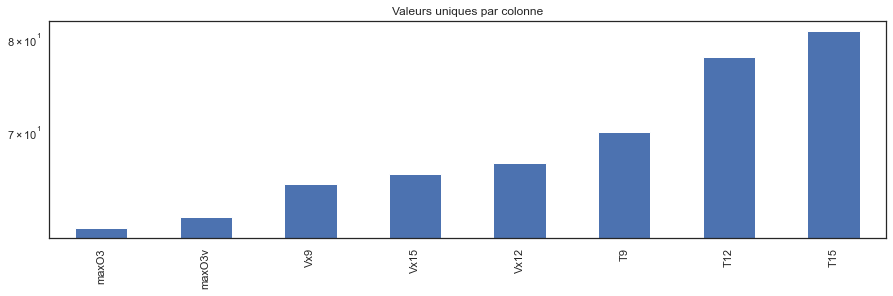

In [10]:
get_unique_values(data[num_col])

maxO3 et maxO3v are integers so they obviously have fewer unique values.
T12 and T15 have way more unique values than other features (do they use different measure devices, are temperatures just more stable in the morning?)

### Checking missing values

In [11]:
data.isna().any()

maxO3     False
T9        False
T12       False
T15       False
Ne9       False
Ne12      False
Ne15      False
Vx9       False
Vx12      False
Vx15      False
maxO3v    False
wind      False
rain      False
dtype: bool

## Stats / Visualization

In [12]:
data.describe()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,90.303571,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429
std,28.187225,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853
min,42.000000,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000
25%,70.750000,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000
50%,81.500000,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000
75%,106.000000,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000
max,166.000000,27.000000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,5.000000,166.000000


Wind speed is the column that varies most from its average, so it's certainly interesting.
Temperature varies very little in comparison, but is still interesting because it can vary a lot from one day to the next, or from one season to the next.
Cloud cover doesn't seem to have an upward or downward trend with the time of day; the very slight variations in average can perhaps be explained by the small scale of the dataset.
There's a big difference between the average wind speed between 9am and 12pm, then a slight one between 12pm and 3pm.

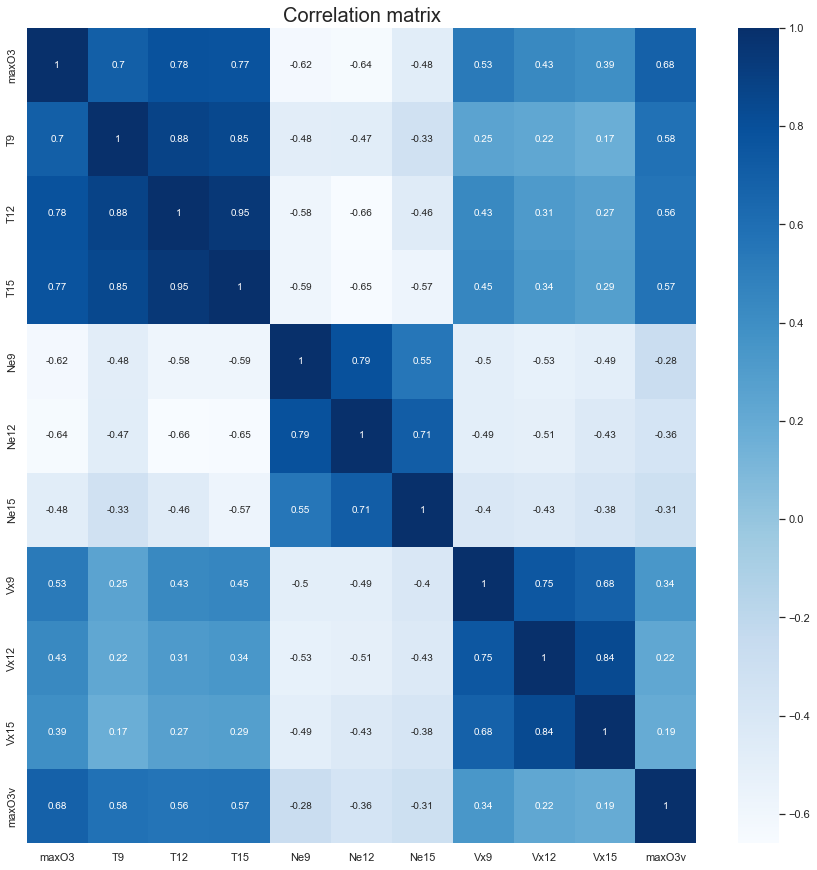

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
plt.title("Correlation matrix", fontsize=20)
sns.heatmap(data=data[non_nominal_col].corr(),cmap='Blues',annot=True, ax=ax)
plt.show()

Variables that represent the same measurement but at a different time are highly correlated with each other, which is to be expected --> if you want to run a model later, you may not need to keep all the times.
The maximum ozone concentration is highly correlated with temperature, with the maximum O3 concentration the previous day, and also with cloud cover at the beginning/middle of the day.
Numerical variables that don't measure the same thing are still slightly correlated, especially cloud cover, especially at 12 noon, which is more closely correlated (inversely proportional) to temperature at 12 noon and 3 p.m., consistent with the fact that a high proportion of clouds heralds a change in the weather, often rain, and therefore a drop in temperature.

Since maxO3, which represents the maximum ozone concentration on the day of measurement, is more correlated with all variables than maxO3v it will be interesting to study the relationship between maxO3 and the other variables.

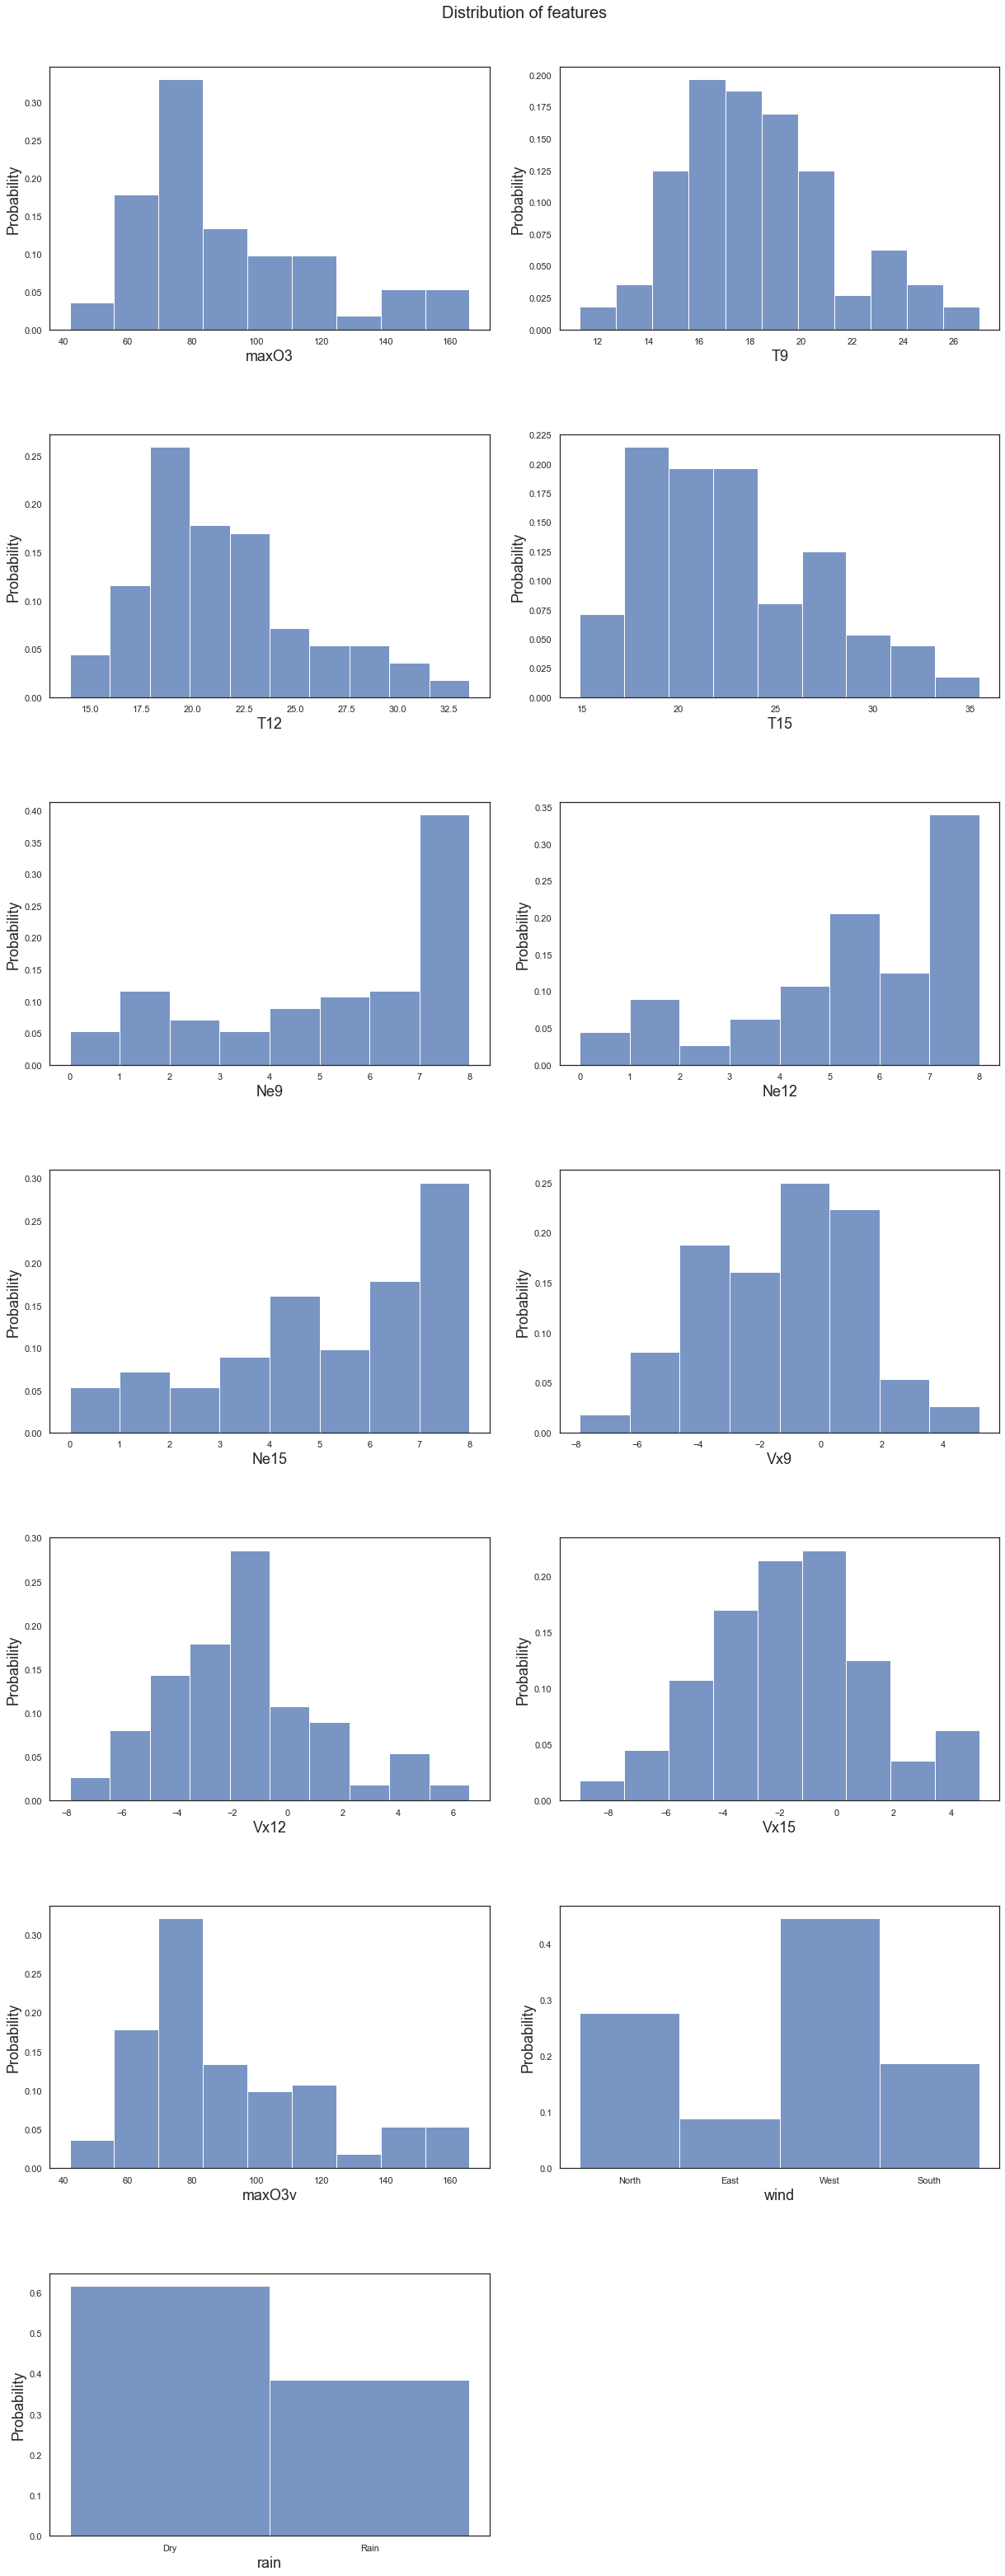

In [15]:
fig1 = distribution(data, data.columns)
fig1.suptitle("Distribution of features", fontsize=20, y=0.92)
plt.show()

Surprisingly, there is a high proportion of rain, comparable to dry weather. 
Most of the wind comes from the west, and very little from the east.

Distributions:
- Cloudiness: rather flat and uniform distributions, with the exception of a large peak at 7 or 8.
- Temperatures and ozone concentrations: more or less asymmetrical to the right.
- Wind speeds: almost normal distributions, especially Vx15.

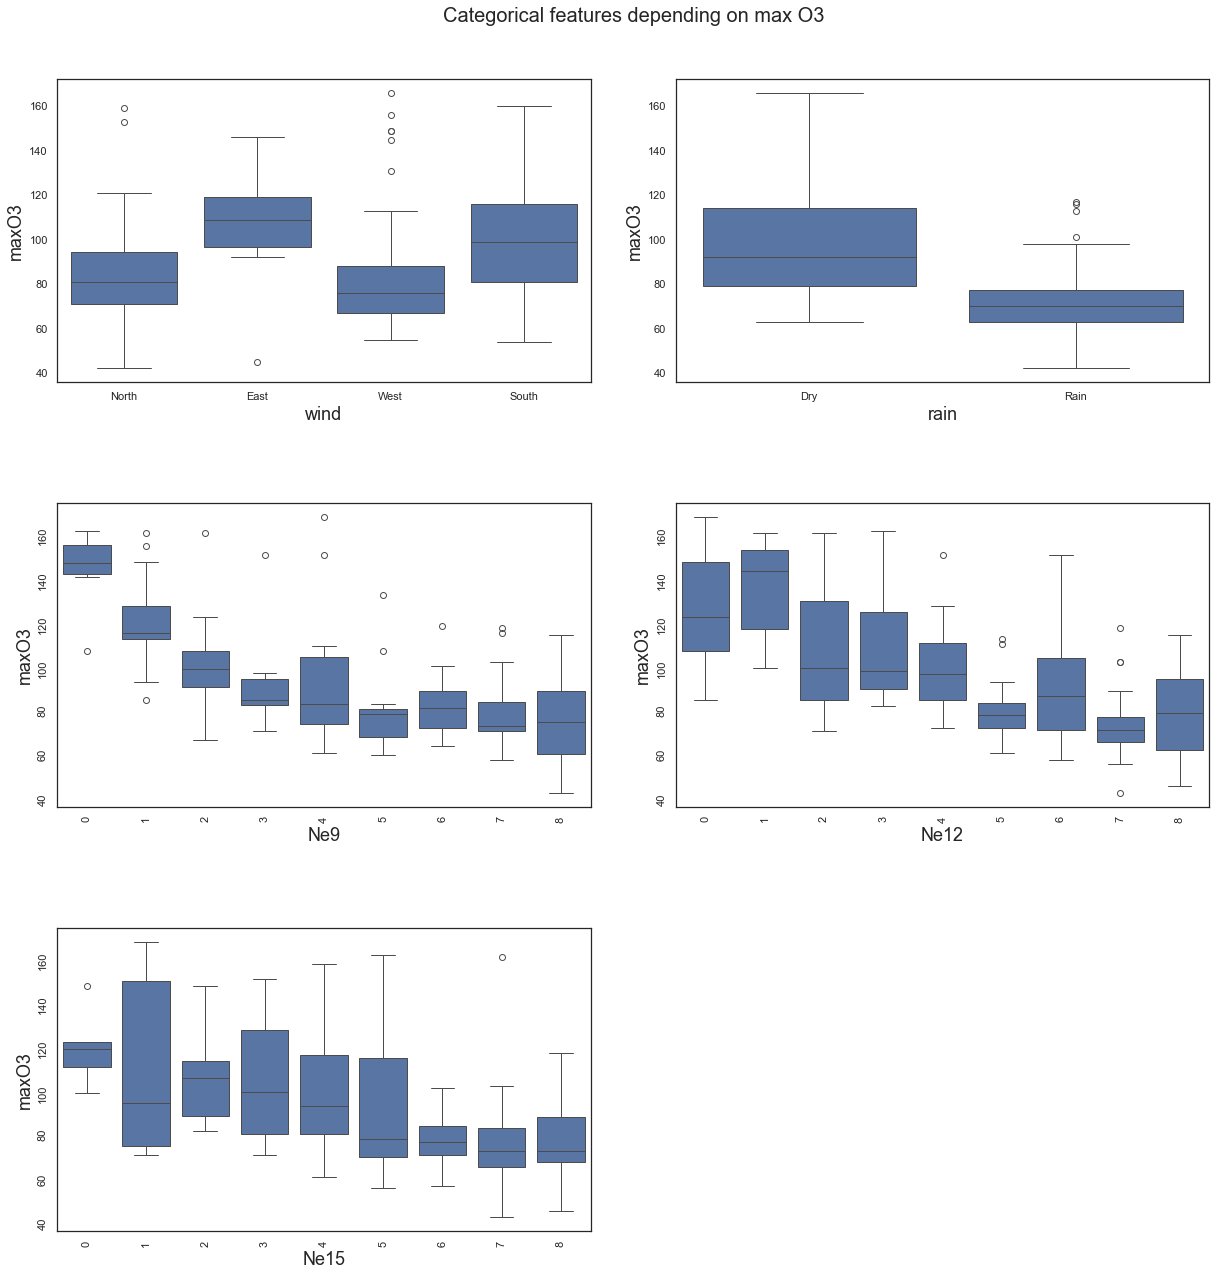

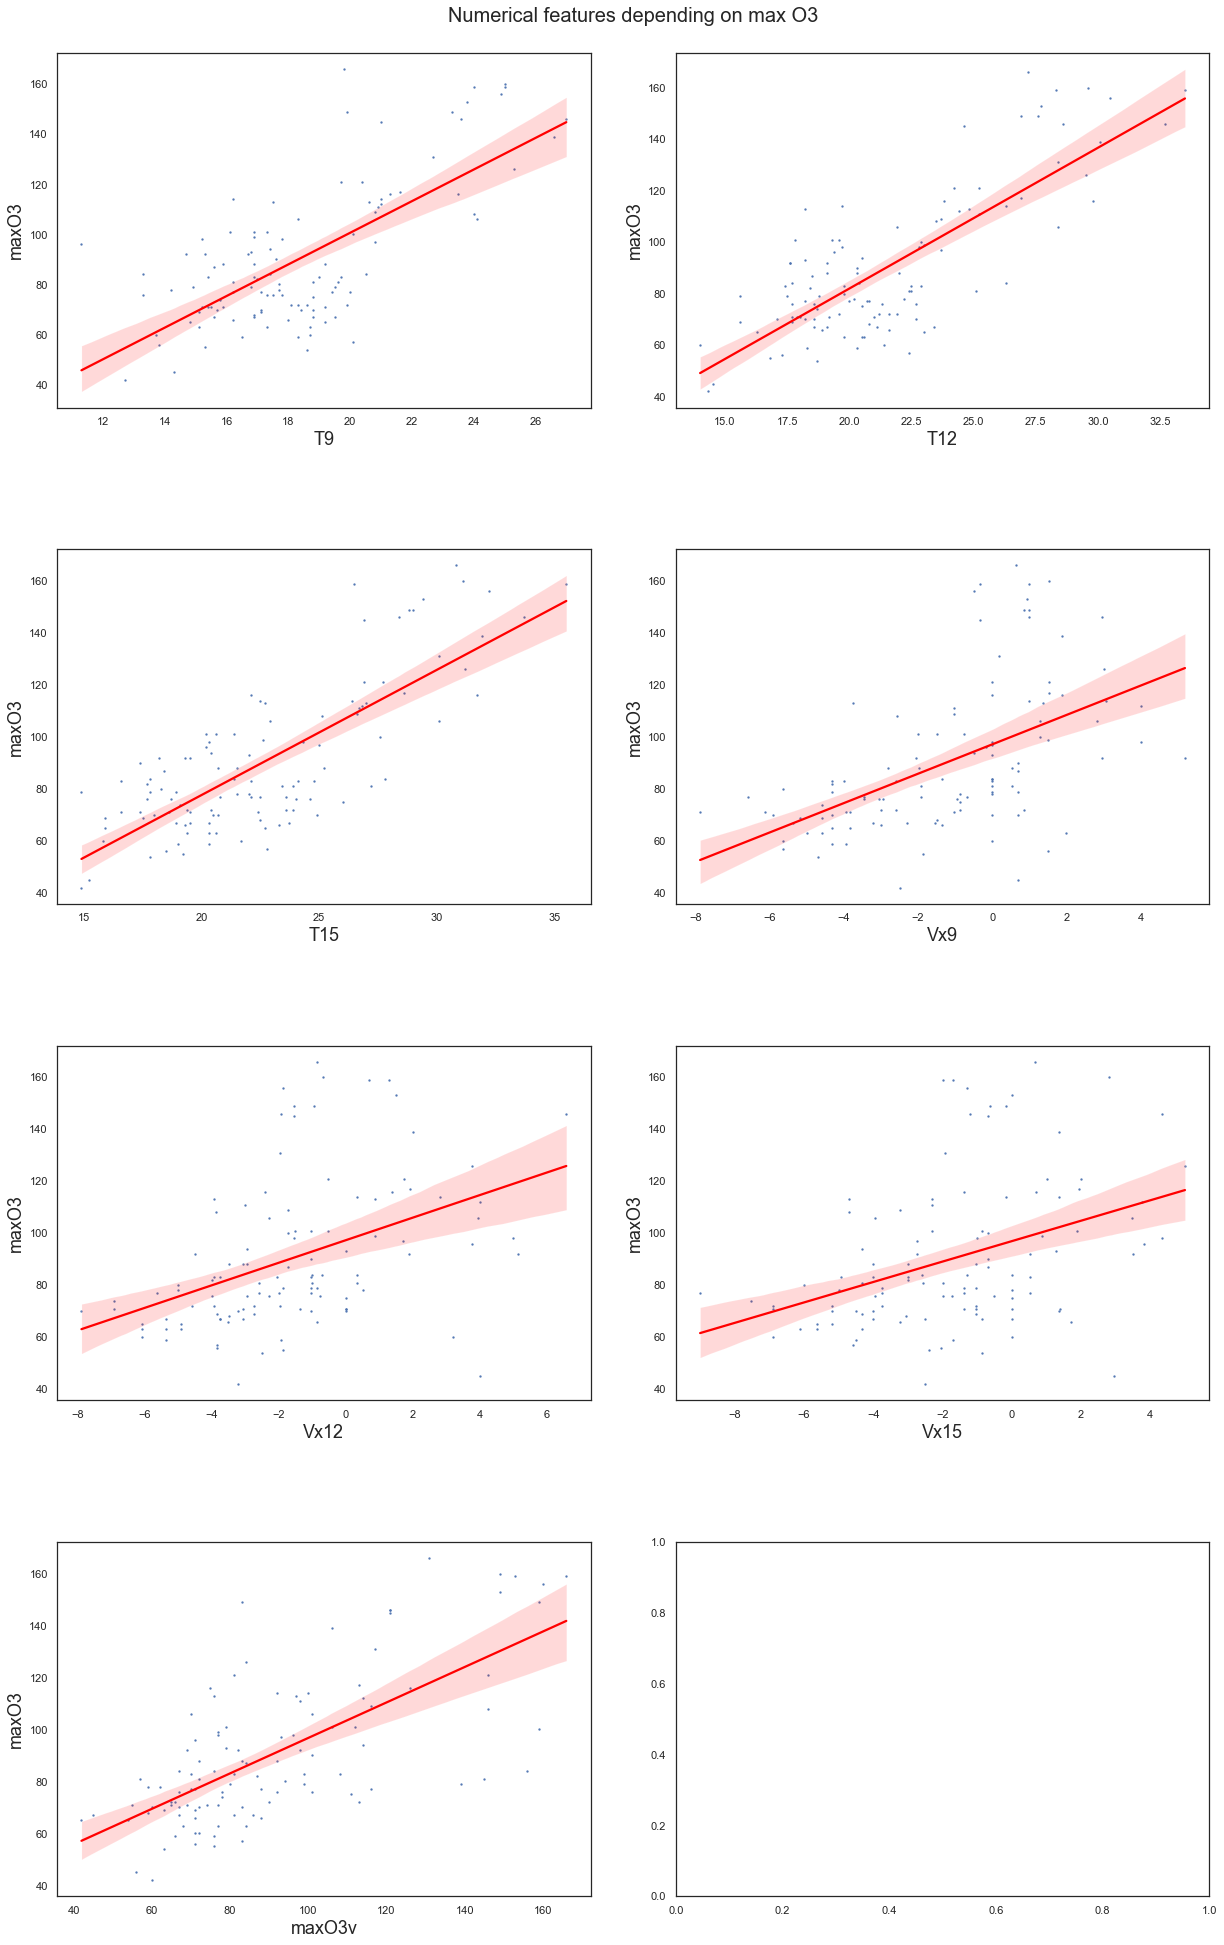

In [16]:
fig2 = cat_plot(data, cat_col, "maxO3", "regression")
fig2.suptitle("Categorical features depending on max O3", fontsize=20, y=0.95)
fig3 = num_plot(data, num_col, "maxO3", "regression")
fig3.suptitle("Numerical features depending on max O3", fontsize=20, y=0.92)
plt.show()

The higher the east-west wind speed projection, the higher the ozone concentration.
The greater the cloud cover, the lower the ozone concentration.
The higher the air temperature, the higher the ozone concentration.
Rainy weather has a highly concentrated, restricted and low range of maxO3 values -> rain is therefore a major factor in low ozone concentration.

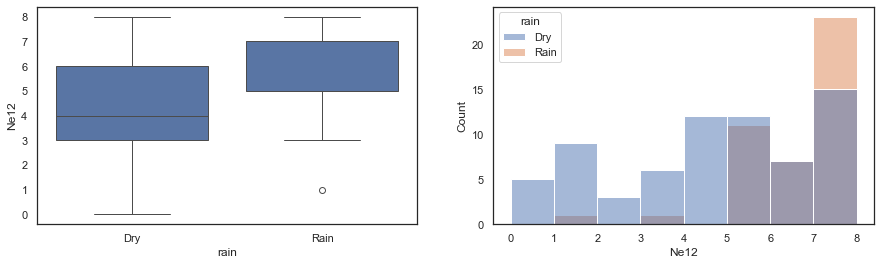

In [17]:
fig, axes = plt.subplots(ncols = 2, nrows=1, figsize=(15,4))
sns.boxplot(data=data, x="rain", y="Ne12", ax=axes[0])
sns.histplot(data=data,x="Ne12", hue="rain", ax=axes[1])
plt.show()

Logically, rainy weather is (almost) always preceded by heavy cloud cover at midday. The rain variable is therefore closely linked to Ne12. We also note a slight outlier

In [18]:
data[(data.rain == "Rain") & (data.Ne12 < 4)].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
811,98,17.8,22.8,24.3,1,1,0,0.0000,-1.5321,-1.0000,77,West,Rain
921,96,11.3,19.4,20.2,3,3,3,-0.1736,3.7588,3.8302,71,East,Rain


Given the very low temperature at 9am for summer, it looks as if it has already rained during the night, so it's normal that the cloud cover isn't necessarily high during the day. Since we don't know how and when the rain is recorded, we'll keep it.

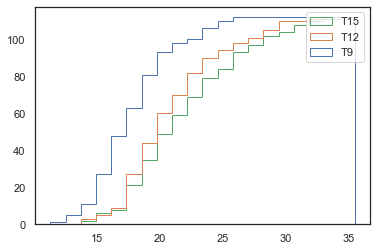

In [19]:
plt.hist([data.T9, data.T12, data.T15], 20, cumulative=True, label=['T9', 'T12','T15'], histtype='step')
plt.legend(loc='upper right')
plt.show()

This graph confirms the fact that the later in the day the temperature is taken, the higher it is.

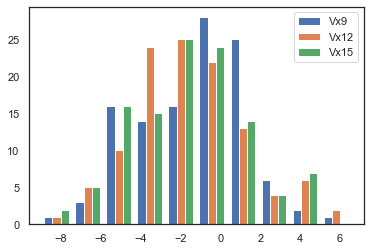

In [20]:
plt.hist([data.Vx9, data.Vx12, data.Vx15], 10, cumulative=False, label=['Vx9', 'Vx12','Vx15'], histtype='bar')

plt.legend(loc='upper right')
plt.show()

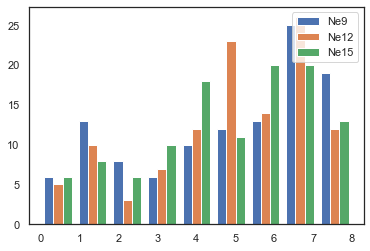

In [21]:
plt.hist([data.Ne9, data.Ne12, data.Ne15], 9, cumulative=False, label=['Ne9', 'Ne12','Ne15'], histtype='bar')
plt.legend(loc='upper right')
plt.show()

Temperature and cloud cover are more distinct, with no real general trend in relation to the hour of measurement.

## Handling outliers

The graph of maxO3 versus Ne15 shows 1 outlier

In [22]:
data[(data.Ne15 > 6) & (data.maxO3 > 140)].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
727,159,24.0,28.3,26.5,2,2,7,-0.342,1.2856,-2.0,153,North,Dry


In [23]:
#We check if there are other points with such a high variation in cloud cover
data[data.Ne15 - data.Ne12 > 4].head(100)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
727,159,24.0,28.3,26.5,2,2,7,-0.342,1.2856,-2.0,153,North,Dry


In [24]:
#We check to see if there are other points with a significant drop in temperature between 12pm and 3pm.
data[(data.T12 - data.T15) > 1.5].head(100)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
614,90,17.6,20.3,17.4,7,6,8,0.6946,-1.0419,-0.6946,101,South,Dry
727,159,24.0,28.3,26.5,2,2,7,-0.3420,1.2856,-2.0000,153,North,Dry
802,116,21.3,23.8,22.1,7,7,8,0.0000,-2.3941,-1.3892,126,South,Rain
819,67,18.8,21.1,18.9,7,7,8,-5.3623,-5.3623,-2.5000,86,West,Rain


In [25]:
data[data.index == 728].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
728,149,23.3,27.6,28.8,4,6,3,0.866,-1.5321,-0.1736,159,West,Dry


The point is an outlier, it's strange to go from 2 to 7 in cloud cover in 3 hours (it's the only point with such a big difference), especially as the next day's temperature doesn't seem to have been affected and the weather is dry. What's more, the temperature is dropping while cloud cover was low.
--> maybe a mistake, we'll delete it

In [26]:
print(data.shape[0])
data = data[~((data.Ne15 > 6) & (data.maxO3 > 140))]
print(data.shape[0])

112
111


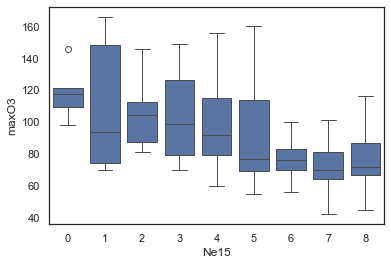

In [27]:
sns.boxplot(data=data, x="Ne15", y="maxO3")
plt.show()

The graph of maxO3 versus Vx12 contains 2 outliers

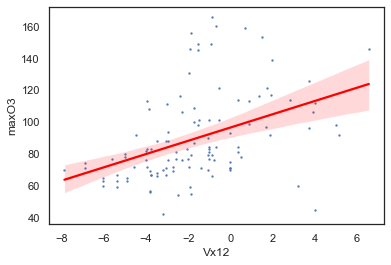

In [28]:
sns.regplot(data=data, x="Vx12", y="maxO3", scatter_kws={"s": 2}, line_kws={'color': 'red'})
plt.show()

In [29]:
data[(data.maxO3 < 90) & (data.Vx12 > 2)].head(100)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
713,45,14.3,14.5,15.2,8,8,8,0.684,4.0000,2.9544,56,East,Rain
917,60,13.7,14.0,15.8,4,5,4,0.000,3.2139,0.0000,71,North,Rain


A wind speed equal to 0 seems rather abnormal, especially with the accuracy of the other values given. Let's see if there are others.

In [30]:
data[(data.Vx9 == 0) | (data.Vx12 == 0) | (data.Vx15 == 0)].head(100)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
610,79,14.9,17.5,18.9,5,5,4,0.0000,-1.0419,-1.3892,99,North,Dry
621,81,16.2,22.4,23.4,8,3,1,0.0000,0.3473,-2.5712,145,North,Dry
624,121,20.4,25.2,27.7,1,0,0,0.0000,-0.5209,1.0261,146,North,Dry
701,70,18.8,22.7,24.9,5,2,1,0.6840,0.0000,1.3681,67,North,Dry
705,93,16.8,18.2,22.0,8,8,6,0.0000,0.0000,1.2856,79,South,Rain
706,97,20.8,23.7,25.0,2,3,4,0.0000,1.7101,-2.7362,93,North,Dry
715,67,16.9,19.1,19.5,5,5,6,-2.2981,-3.7588,0.0000,67,West,Rain
716,84,17.4,20.4,21.4,3,4,6,0.0000,0.3473,-2.5981,67,South,Dry
724,83,19.0,22.5,24.1,2,4,6,0.0000,-1.0261,0.5209,81,North,Dry


There are many zero speed values. If the wind is quasi-perpendicular to the east-west axis and the values are rounded or sometimes lack precision, it may be normal to have a 0. As a precaution, we keep the lines with a 0 whose wind direction is North or South and delete those whose wind direction is East and West and the other speed values during the day are sufficiently far from 0.
But to make a better decision, we need to know how the data was collected and the exact wind direction.

In [31]:
data[(((data.Vx9 == 0) | (data.Vx12 == 0) | (data.Vx15 == 0)) & (data.wind.isin(["East","West"])) & (abs(data.Vx9) + abs(data.Vx12) + abs(data.Vx15) > 1))].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
715,67,16.9,19.1,19.5,5,5,6,-2.2981,-3.7588,0.0,67,West,Rain
811,98,17.8,22.8,24.3,1,1,0,0.0000,-1.5321,-1.0,77,West,Rain
920,71,15.5,18.0,17.4,7,7,6,-3.9392,-3.0642,0.0,65,West,Dry


In [32]:
print(data.shape[0])
data = data[~(((data.Vx9 == 0) | (data.Vx12 == 0) | (data.Vx15 == 0)) & (data.wind.isin(["East","West"])) & (abs(data.Vx9) + abs(data.Vx12) + abs(data.Vx15) > 1))]
print(data.shape[0])
#We also delete the outlier whose wind speed was not equal to 0.
print(data.shape[0])
data = data[~((data.maxO3 < 90) & (data.Vx12 > 2))]
print(data.shape[0])

111
108
108
106


There seem to be many integers other than 0 among the speeds.

In [33]:
data[((data.Vx9.isin([-2,-1,1,2,3,4])) | (data.Vx12.isin([-2,-1,1,2,3,4])) | (data.Vx15.isin([-2,-1,1,2,3,4])))].head(100)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
622,121,19.7,24.2,26.9,2,1,0,1.5321,1.7321,2.0000,81,East,Dry
623,146,23.6,28.6,28.4,1,1,2,1.0000,-1.9284,-1.2155,121,South,Dry
703,139,26.6,30.1,31.9,0,1,4,1.8794,2.0000,1.3681,106,South,Dry
717,63,15.1,20.5,20.6,8,6,6,2.0000,-5.3623,-6.1284,84,West,Rain
723,81,18.8,22.5,23.9,6,3,2,0.5209,-1.0000,-2.0000,72,North,Dry
725,149,19.9,26.9,29.0,3,4,3,1.0000,-0.9397,-0.6428,83,West,Dry
801,126,25.3,29.5,31.2,1,4,4,3.0000,3.7588,5.0000,84,East,Dry
825,159,25.0,33.5,35.5,1,1,1,1.0000,0.6946,-1.7101,166,South,Dry
828,112,21.0,24.4,26.8,1,6,3,4.0000,4.0000,3.7588,114,East,Dry


Strange but hard to know why, and deleting so many points in such a small dataset is not a good idea.

We now look at the graph of maxO3 as a function of wind direction, where there was an outlier for the easterly wind.

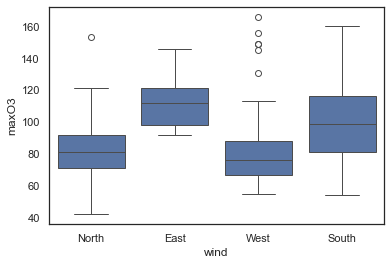

In [34]:
sns.boxplot(data=data, x="wind", y="maxO3")
plt.show()

The east wind outlier must have been removed earlier. 
A wind from the east gives a good idea of ozone concentration; a wind from the north also, but a little less.
Winds from the west have a lot of outliers, so it's more complicated, and the range of values for winds from the south is very wide.

We now visualize the 2 duos of variables of different units that are most correlated (except maxO3).

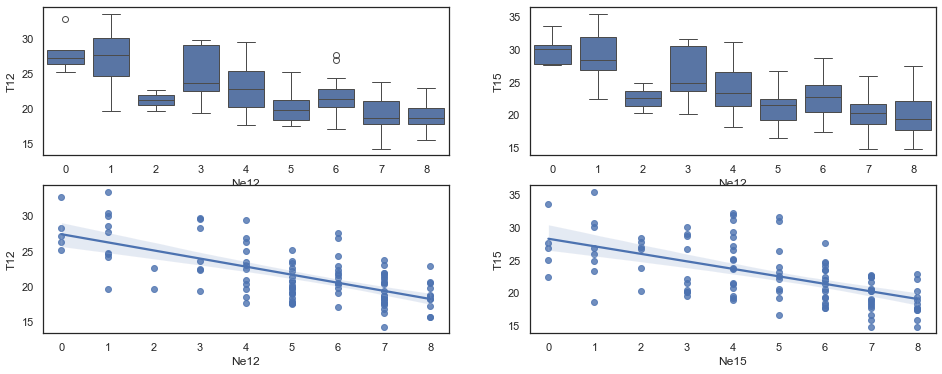

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(16,6))
axs = axes.flatten()
sns.boxplot(data=data, x='Ne12', y='T12', ax=axs[0])
sns.boxplot(data=data, x='Ne12', y='T15', ax=axs[1])
sns.regplot(data=data,x='Ne12',y='T12', ax=axs[2])
sns.regplot(data=data,x='Ne15',y='T15', ax=axs[3])
plt.show()

There is indeed a relationship; + Ne rises + T falls, and it remains more or less the same for Ne at 12h and Ne at 15h.

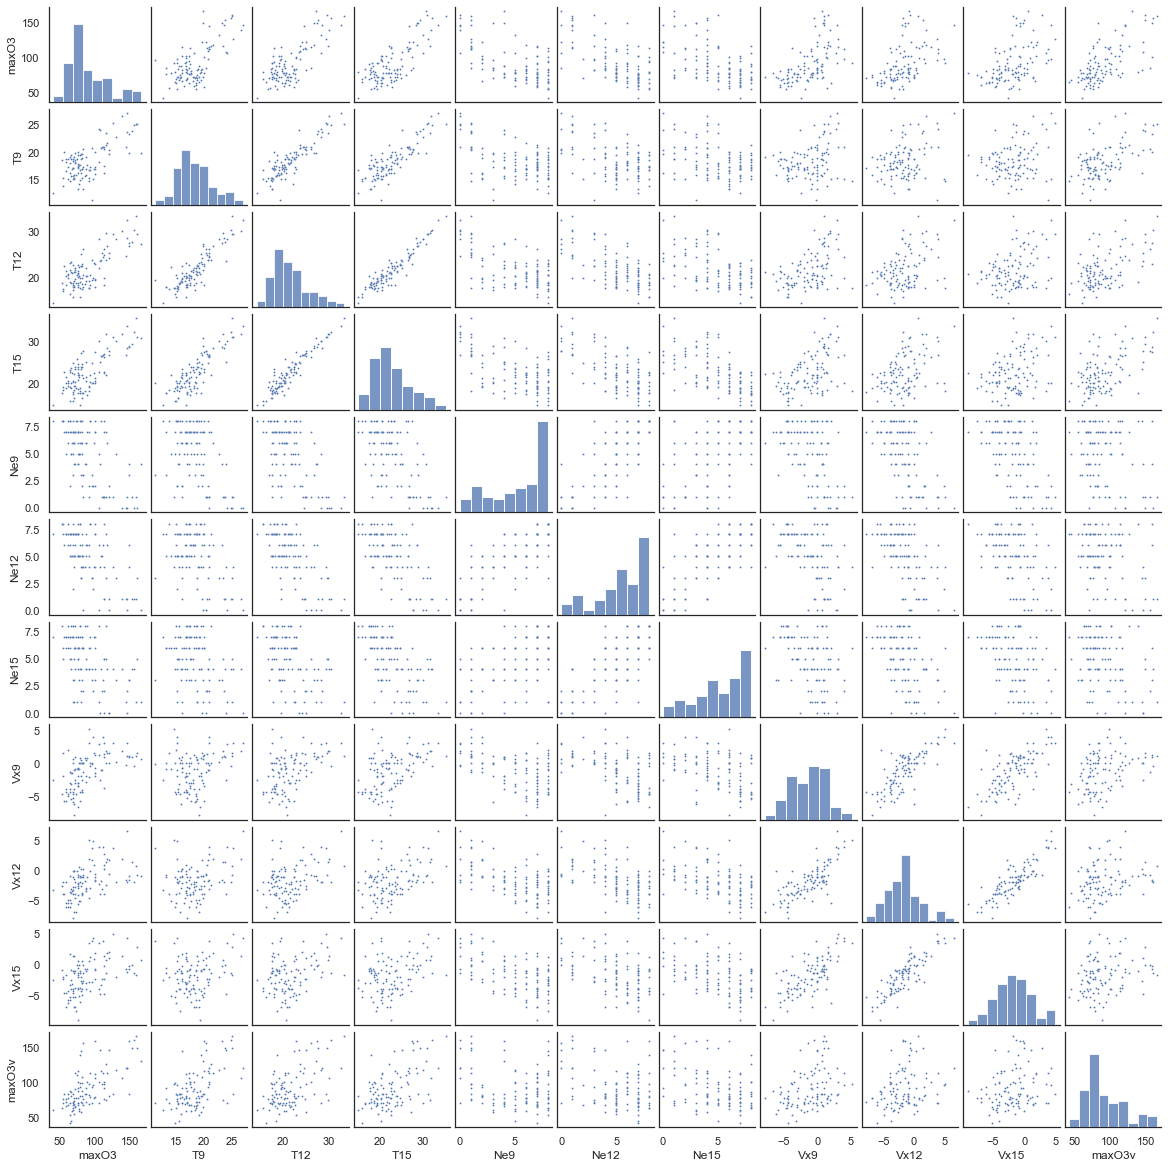

In [36]:
#In case there are any connections or outliers I haven't noticed
sns.pairplot(data, height=1.5, plot_kws={"s": 3.5, "alpha": 1})
plt.show()

Nothing special, we can see the linear correlation between variables measuring the same thing at different times.
No remaining outliers, but we can see a few groups of points that are a little far apart :

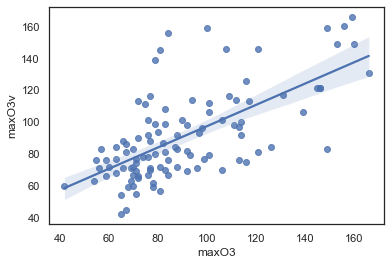

In [37]:
sns.regplot(data=data,x='maxO3',y='maxO3v')
plt.show()

In [38]:
data[(data.maxO3v > 140) & (data.maxO3 < 140)].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
621,81,16.2,22.4,23.4,8,3,1,0.0000,0.3473,-2.5712,145,North,Dry
624,121,20.4,25.2,27.7,1,0,0,0.0000,-0.5209,1.0261,146,North,Dry
626,108,24.0,23.5,25.1,4,4,0,-2.5712,-3.8567,-4.6985,146,South,Dry
731,84,20.5,26.3,27.8,1,0,2,-1.3681,-0.6946,0.0000,156,North,Dry
826,100,20.1,22.9,27.6,8,8,6,1.2856,-1.7321,-0.6840,159,West,Dry


In [39]:
data[(data.index.isin([620,623,625,730,825]))].head()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,wind,rain
obs,,,,,,,,,,,,,
620,145,21.0,24.6,26.9,0,1,1,-0.3420,-1.5321,-0.6840,121,West,Dry
623,146,23.6,28.6,28.4,1,1,2,1.0000,-1.9284,-1.2155,121,South,Dry
625,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121,East,Dry
730,156,24.9,30.5,32.2,0,1,4,-0.5000,-1.8794,-1.2856,160,West,Dry
825,159,25.0,33.5,35.5,1,1,1,1.0000,0.6946,-1.7101,166,South,Dry


These points have a much lower ozone concentration than the previous day, due to a drop in temperature accompanied by high cloud cover. Nothing unusual

As the numerical variables are highly correlated, let's make a PCA for each unit (temperature, wind speed, cloud cover) in an attempt to reduce dimensionality without losing too much information.

In [40]:
vx_col = ["Vx9","Vx12","Vx15"]
vx_data = data[vx_col]
ne_col = ["Ne9","Ne12","Ne15"]
ne_data = data[ne_col]
t_col = ["T9","T12","T15"]
t_data = data[t_col]

In [41]:
vx_pca, score, components, pca_df = perform_pca(vx_data, vx_col)
pca_df.head()

Explained variance for 1st component :  0.8471355555699797
Explained variance for 2nd component :  0.10726543254266929


,Vx9,Vx12,Vx15
PC1,0.555034,0.595353,0.580940
PC2,0.813507,-0.242731,-0.528477


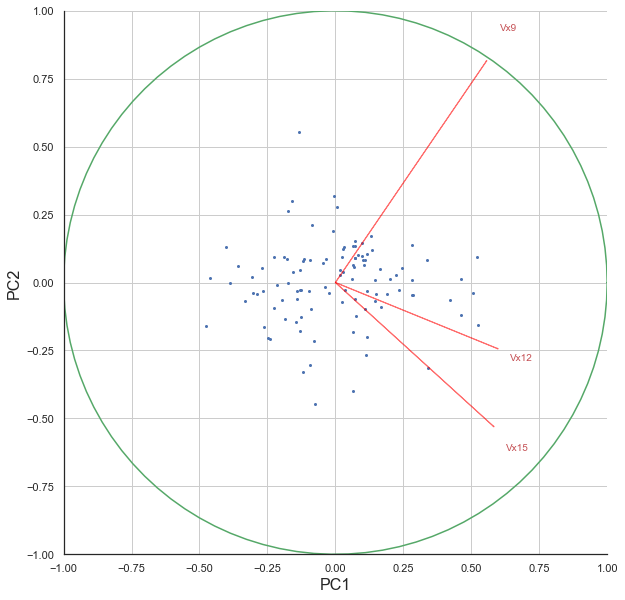

<Figure size 432x288 with 0 Axes>

In [42]:
biplot(score, 
       components, 
       vx_col)

In [43]:
ne_pca, score, components, pca_df = perform_pca(ne_data, ne_col)
pca_df.head()

Explained variance for 1st component :  0.7876878337064892
Explained variance for 2nd component :  0.15288436797218294


,Ne9,Ne12,Ne15
PC1,-0.568460,-0.612492,-0.549278
PC2,0.642424,0.086611,-0.761439


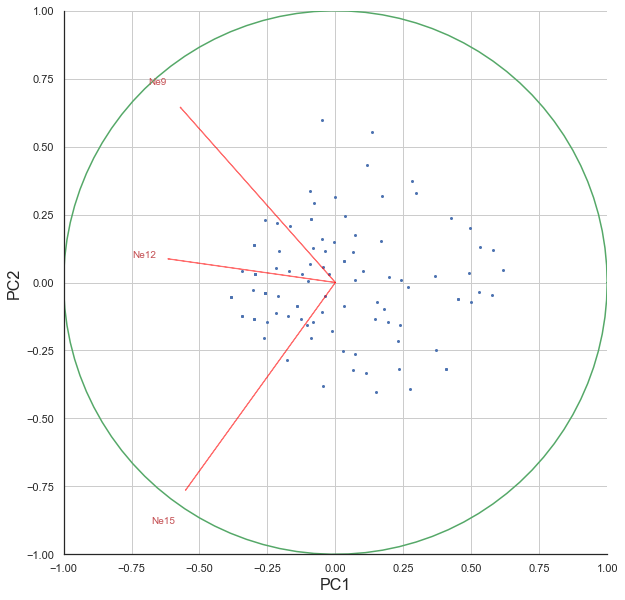

<Figure size 432x288 with 0 Axes>

In [44]:
biplot(score, 
       components, 
       ne_col)

In [45]:
t_pca, score, components, pca_df = perform_pca(t_data, t_col)
pca_df.head()

Explained variance for 1st component :  0.9252257406620508
Explained variance for 2nd component :  0.05783219450124684


,T9,T12,T15
PC1,0.56436,0.587219,0.580235
PC2,-0.81411,0.279389,0.509085


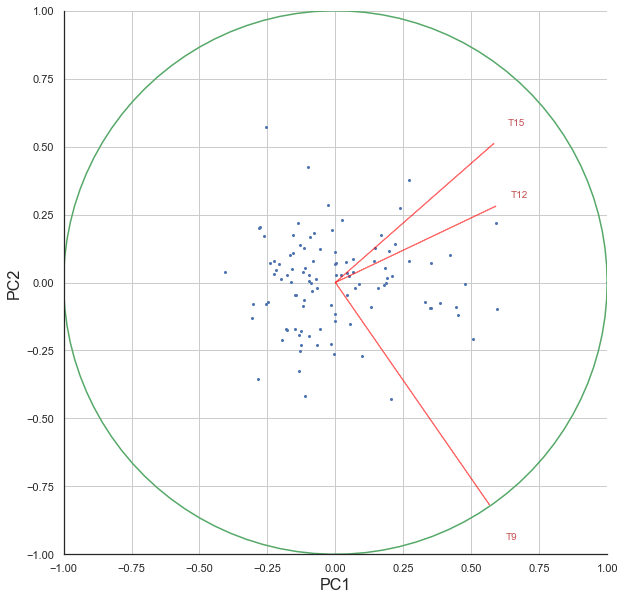

<Figure size 432x288 with 0 Axes>

In [46]:
biplot(score, 
       components, 
       t_col)

For the 3 PCAs, the vast majority of variance is explained by a single component, so keeping the PC1s for each of the 3 PCAs would be a possibility. A PCA on all the columns is also possible, especially given that they are all quite related to each other.
The loading vectors for wind speed and cloud cover at 12h and 15h are very close, confirming that we don't need to include these 2 measurements in the model at the same time.

Categorical variable encoding:
- rain: data.rain = data.rain.replace({“Dry”:0, “Rain”:1})
- wind: try encoding in onehot, leave-one-out, WOE, count or what has already been done for directions